# Introduction to NetworkX: Data Structures and Visualizations

**Author:** Tran Thu Le & ChatGPT  
**Date:** 18/02/2023  


**Abstract.** NetworkX is a Python library for the creation, manipulation, and study of complex networks. In this tutorial, we will cover the basics of using NetworkX, including how to create and manipulate graphs, how to visualize graphs, and how to perform basic graph analysis.



In [1]:
!pip install networkx 

## Create a basic network

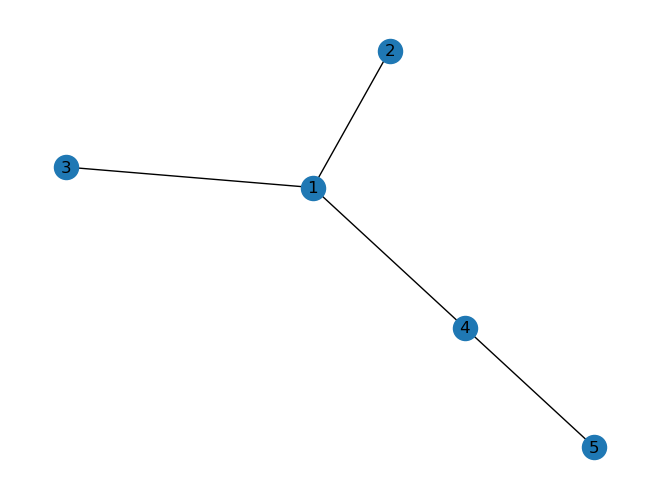

In [2]:
# 1. import package "networkX"
import networkx as nx

# 2. create graph 
G = nx.Graph()

# 3. add nodes and edges
edges = [(1,2), (1, 3), (1, 4), (4, 5)]
G.add_edges_from(edges)

# 4. plot the graph
import matplotlib.pyplot as plt
pos = nx.spring_layout(G) # positions of nodes
nx.draw(G, pos, with_labels=True)
plt.show()

**Data Structures:**

NetworkX provides several different data structures for representing graphs, including
- edge lists,  
- adjacency lists,  
- adjacency matrices.  

The choice of data structure depends on the *size* of the graph and the *type* of analysis you will be performing.

### Edge List

An edge list is a list of tuples that represents the edges of a graph. Each tuple contains the two nodes that are connected by the edge.


In [3]:
# Get the edge list of the graph
edge_list = nx.generate_edgelist(G)
print(list(edge_list))

['1 2 {}', '1 3 {}', '1 4 {}', '4 5 {}']



### Other data structures: Adjacency List and Adjacency Matrix

An adjacency list is a **list of lists** that represents the edges of a graph. Each element of the list represents a node in the graph, and the corresponding sublist contains the nodes that are adjacent to it.

An adjacency matrix is a **matrix** that represents the edges of a graph. The rows and columns of the matrix represent the nodes in the graph, and the entries in the matrix represent the edges between the nodes.


In [4]:
# Get the adjacency list of the graph
adj_list = nx.generate_adjlist(G)
print(list(adj_list))

# Get the adjacency matrix of the graph
adj_matrix = nx.adjacency_matrix(G)
print(adj_matrix.todense())

['1 2 3 4', '2', '3', '4 5', '5']
[[0 1 1 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 1]
 [0 0 0 1 0]]


/tmp/ipykernel_8104/2292460730.py:6: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(G)


## Create network with data

In many cases, it is useful to assign weights to nodes or lengths/capacities to edges in a graph. For example, weights can represent the importance of a node or the length of a path in a transportation network, while capacities can represent the maximum flow that can pass through an edge in a network flow problem. NetworkX provides a way to assign weights to nodes and lengths/capacities to edges, and to access these data when needed.

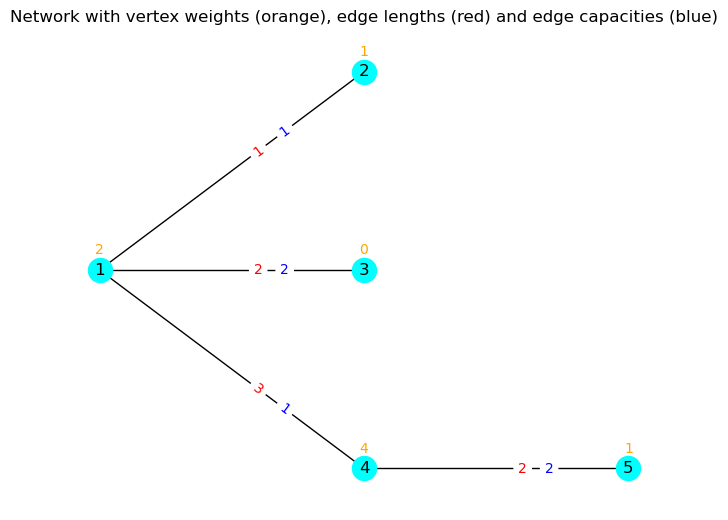

In [5]:
# 1. create new graph 
G = nx.Graph()

# 2. create data of nodes and edges
nodes = [(1, {"weight": 2}),
         (2, {"weight": 1}),
         (3, {"weight": 0}),
         (4, {"weight": 4}),
         (5, {"weight": 1})]

edges = [(1, 2, {"length": 1, "capacity": 1}),
         (1, 3, {"length": 2, "capacity": 2}),
         (1, 4, {"length": 3, "capacity": 1}),
         (4, 5, {"length": 2, "capacity": 2})]

# 3. create graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)


# 4 retrieve the data from the graph
node_weights = nx.get_node_attributes(G, 'weight')
edge_lengths = nx.get_edge_attributes(G, 'length')
edge_capacities = nx.get_edge_attributes(G, 'capacity')


# 5. plot the graph and data 
pos = {1: (0, 0), 
       2: (1, 1),
       3: (1, 0),
       4: (1, -1),
       5: (2, -1)}
pos_labels = {k: (v[0], v[1]+0.1) for k, v in pos.items()} # adjust y-position of labels
nx.draw(G, pos, with_labels=True, node_color="cyan")
nx.draw_networkx_labels(G, pos_labels, labels=node_weights, font_size=10, font_color="orange")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_lengths, label_pos=0.4, font_color="red")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_capacities, label_pos=0.3, font_color="blue")
plt.title("Network with vertex weights (orange), edge lengths (red) and edge capacities (blue)")
plt.show() 

You can access the nodes, edges and their atributes as follows.

In [6]:
# access the whole data
print(G.nodes.data())
print(G.edges.data())

# access each data 
print()
print(f"data of vertex 5 is {G.nodes[5]}")
print(f"data of edge (1, 2) is {G.edges[(1, 2)]}")

[(1, {'weight': 2}), (2, {'weight': 1}), (3, {'weight': 0}), (4, {'weight': 4}), (5, {'weight': 1})]
[(1, 2, {'length': 1, 'capacity': 1}), (1, 3, {'length': 2, 'capacity': 2}), (1, 4, {'length': 3, 'capacity': 1}), (4, 5, {'length': 2, 'capacity': 2})]

data of vertex 5 is {'weight': 1}
data of edge (1, 2) is {'length': 1, 'capacity': 1}
